<a href="https://colab.research.google.com/github/metaperson1/Machine-Learning/blob/main/MultiModel_TitanicSurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Be the hero of the day by predicting the survival of Titanic passengers

Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. 

**In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.**
GoodLuck!!!

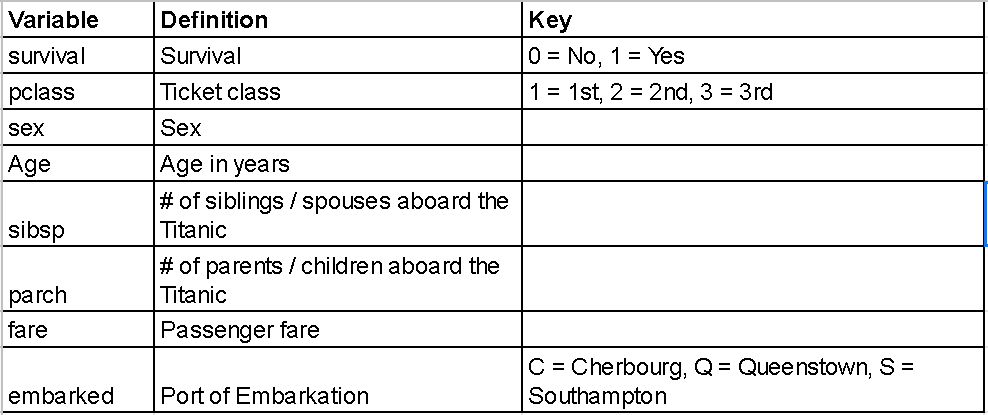

# **Importing Necessary Libraries** 

In [ ]:
# For running pandas_profiling
# ! pip install pandas==0.25.3
# !pip install numpy==1.16.5
import numpy as np                    # for numerical calculation (array, matrices)
import pandas as pd                   # to handle data structure operations 
import matplotlib.pyplot as plt       # for graphs and plots 
%matplotlib inline                    
import seaborn as sns                 # for creating heatmap, time series plots, violin plots and more 
import matplotlib.style as style      # for changing styles of plots 
style.use('ggplot')
from pandas_profiling import ProfileReport

import missingno as ms 
import warnings 
warnings.filterwarnings("ignore")


# **Inserting Train & Test Datasets**

In [ ]:
#inserting both the train and test datasets

url = 'https://drive.google.com/file/d/1BNrbPshNvrNHiTe1o-Cp1gpJKY-chv5Z/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]

titanic = pd.read_csv(url)
titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# checking for missing values 

m_val = titanic.isnull().sum().sort_values(ascending=False)       # missings values
m_val.head()

Embarked    0
Fare        0
Parch       0
SibSp       0
Age         0
dtype: int64

# **Dropping Unuseful Columns**

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic.drop(["Embarked"], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
# Value counts of survived / not survived passangers 

pd.DataFrame({' ' : ['Not survived', 'Survived'], 'Value counts' : titanic['Survived']
              .value_counts(), 'Percentage(%)' : [(titanic["Survived"]==0)
              .sum()*100/len(titanic), (titanic["Survived"]==1)
              .sum()*100/len(titanic)]}).set_index(' ').head()

,Value counts,Percentage(%)
,,
Not survived,549,61.616162
Survived,342,38.383838


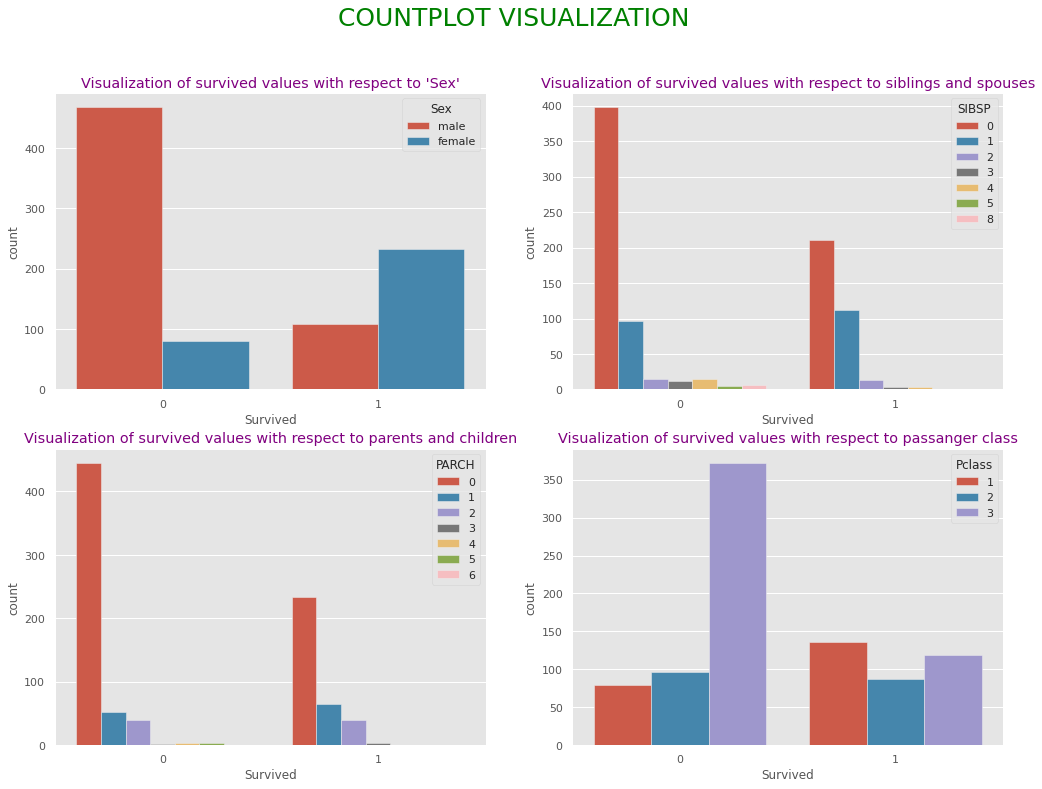

In [ ]:
# Visualization of survived values with respect to different features 

fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(17,12));
fig.suptitle('COUNTPLOT VISUALIZATION', c='green', size=25)

sns.countplot("Survived", data=titanic, hue = "Sex", ax=axs[0][0])
axs[0][0].set_title("Visualization of survived values with respect to 'Sex'", c='purple')

sns.countplot("Survived", data=titanic, hue = "SibSp", ax=axs[0][1])
axs[0][1].set_title("Visualization of survived values with respect to siblings and spouses", c='purple')
axs[0][1].legend(title='SIBSP', loc='upper right')

sns.countplot("Survived", data=titanic, hue = "Parch", ax=axs[1][0])
axs[1][0].set_title("Visualization of survived values with respect to parents and children", c='purple')
axs[1][0].legend(title='PARCH', loc='upper right')

sns.countplot("Survived", data=titanic, hue = "Pclass", ax=axs[1][1])
axs[1][1].set_title("Visualization of survived values with respect to passanger class", c='purple')
axs[1][1].legend(title="Pclass", loc='upper right')
plt.show()

# **Cross Table**

In [ ]:
pd.crosstab(titanic["Survived"], titanic["Pclass"], margins=True, margins_name="Total")

Pclass,1,2,3,Total
Survived,,,,
0,80,97,372,549
1,136,87,119,342
Total,216,184,491,891


In [ ]:
pd.crosstab(titanic["Survived"], titanic["Sex"], margins=True, margins_name="Total")

Sex,female,male,Total
Survived,,,
0,81,468,549
1,233,109,342
Total,314,577,891


# **Data preparation for model fitting**

In [ ]:
# importing necessary libraries for preparing data 

from sklearn.model_selection import train_test_split      # to split dataset into train & test categories 
from sklearn.preprocessing import StandardScaler          # to scale data values 
from sklearn.preprocessing import LabelEncoder            # for categorical variables 

In [ ]:
lben = LabelEncoder()       # label-encoder object

titanic["Sex"] = lben.fit_transform(titanic["Sex"].values)

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [ ]:
X = titanic.drop(["Survived"], axis= "columns") # droping the label variable (Survived) from the data
y = titanic["Survived"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

# **Search for best fitting model**

In [ ]:
# libraries for different machine learning models 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # Module For evaluation metrics
from sklearn.model_selection import train_test_split # Module for splitting the data


In [ ]:
# LOGISTIC_REGRESSION MODEL
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)
lreg_score = round(logisticmodel.score(X_train, y_train) * 100, 2)
print("Accuracy for Logistic Regression Model is:",lreg_score)


# DECISION TREE MODEL 
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)
dtree_score = round(d_tree.score(X_train, y_train) * 100, 2)
print("Accuracy for Decision Tree Model is:",dtree_score)

# RANDOMFOREST MODEL
r_forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
r_forest.fit(X_train, y_train)
rforest_score = round(r_forest.score(X_train, y_train) * 100, 2)
print("Accuracy for Random Forest Model is:",rforest_score)

# SVC
svc = SVC(kernel = 'rbf',random_state =0)
svc.fit(X_train, y_train)
svc_score = round(svc.score(X_train, y_train) * 100, 2)
print("Accuracy for SVC Model is:",svc_score)

# GAUSSIAN NB 
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_score = round(nb.score(X_train, y_train) * 100, 2)
print("Accuracy for Gaussian Model is:",nb_score)

# K Nearest Neighbors 
knn = KNeighborsClassifier(n_neighbors = 3, metric ='minkowski', p=2)
knn.fit(X_train, y_train)
knn_score = round(knn.score(X_train, y_train) * 100, 2)
print("Accuracy for Nearest Neighbors Model is:",knn_score)

Accuracy for Logistic Regression Model is: 79.19
Accuracy for Decision Tree Model is: 98.65
Accuracy for Random Forest Model is: 98.65
Accuracy for SVC Model is: 66.92
Accuracy for Gaussian Model is: 79.79
Accuracy for Nearest Neighbors Model is: 82.78


In [ ]:
selection = pd.DataFrame({'Models' : ['Logistic', 'DecisionTree', 'RandomForest', 'SVC', 'KNN'],
                          'Accuracy values' : [lreg_score,dtree_score,rforest_score,nb_score,knn_score]})
selection.sort_values(by='Accuracy values', ascending=False)

,Models,Accuracy values
1,DecisionTree,98.65
2,RandomForest,98.65
4,KNN,82.78
3,SVC,79.79
0,Logistic,79.19


Text(0.5, 1.0, 'Bar plot for the comparison of scores from different models')

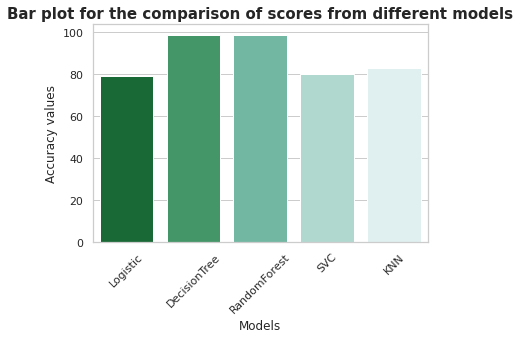

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(x='Models',y='Accuracy values', data=selection,palette="BuGn_r");
plt.xticks(rotation=45)
plt.title("Bar plot for the comparison of scores from different models",weight="bold",size=15)

# **PREDICTION WITH HELP OF RANDOMFOREST MODEL**

In [ ]:
# using test values 

final_predicton = r_forest.predict(X_test)

In [ ]:
# put the prediction into a dataframe 

output_df = pd.DataFrame({'Survived': final_predicton})
output_df.head(10)

,Survived
0,0
1,0
2,0
3,1
4,0
5,1
6,1
7,0
8,1
9,1


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, final_predicton)

0.7428571428571429